In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df=pd.read_csv('dataset.csv')
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [18]:
df.shape

(11055, 32)

In [19]:
df["Result"].unique()

array([-1,  1], dtype=int64)

In [20]:
df["URLURL_Length"].unique()

array([ 1,  0, -1], dtype=int64)

In [21]:
df_features=df.drop(["Result"],axis=1)
df_features.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,5,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [22]:
# Display the number of null values in each feature before dropping
print("Null values in each feature before dropping:")
print(df.isnull().sum())


Null values in each feature before dropping:
index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   

In [23]:
# Drop rows with any null values
df = df.dropna()

# Display the shape of the dataset after dropping null values
print(f"The dataset now has {df.shape[0]} samples and {df.shape[1]} features.")


The dataset now has 11055 samples and 32 features.


In [24]:
# Display the number of null values in each feature after dropping
print("Null values in each feature after dropping:")
print(df.isnull().sum())

Null values in each feature after dropping:
index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0

In [25]:
df_features=df.drop(columns=["Result","index"])
df_features.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


C:\Users\CS\AppData\Local\Temp\ipykernel_18768\844662316.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


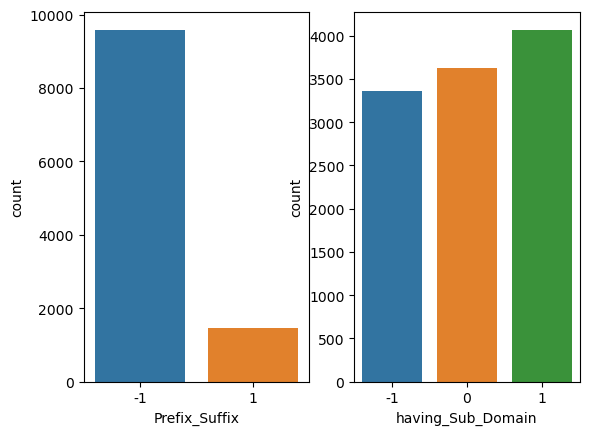

<Figure size 1500x1200 with 0 Axes>

In [26]:
fig, ax = plt.subplots(1,2)
plt.figure(figsize=(15,12))
sns.countplot(x=df['Prefix_Suffix'],ax=ax[0])
sns.countplot(x=df_features['having_Sub_Domain'],ax=ax[1])
fig.show()

In [29]:
plt.figure(figsize=(15,12))
sns.countplot(x=df['Result'],ax=ax[0])
plt.show()

<Figure size 1500x1200 with 0 Axes>

## CORRELATION MATRIX

In [30]:
dfcorr=df_features.corr()
dfcorr.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
having_IPhaving_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,...,0.042881,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103
URLURL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,...,-0.013613,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,...,0.038118,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,...,0.219503,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,...,0.025863,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390


<Axes: >

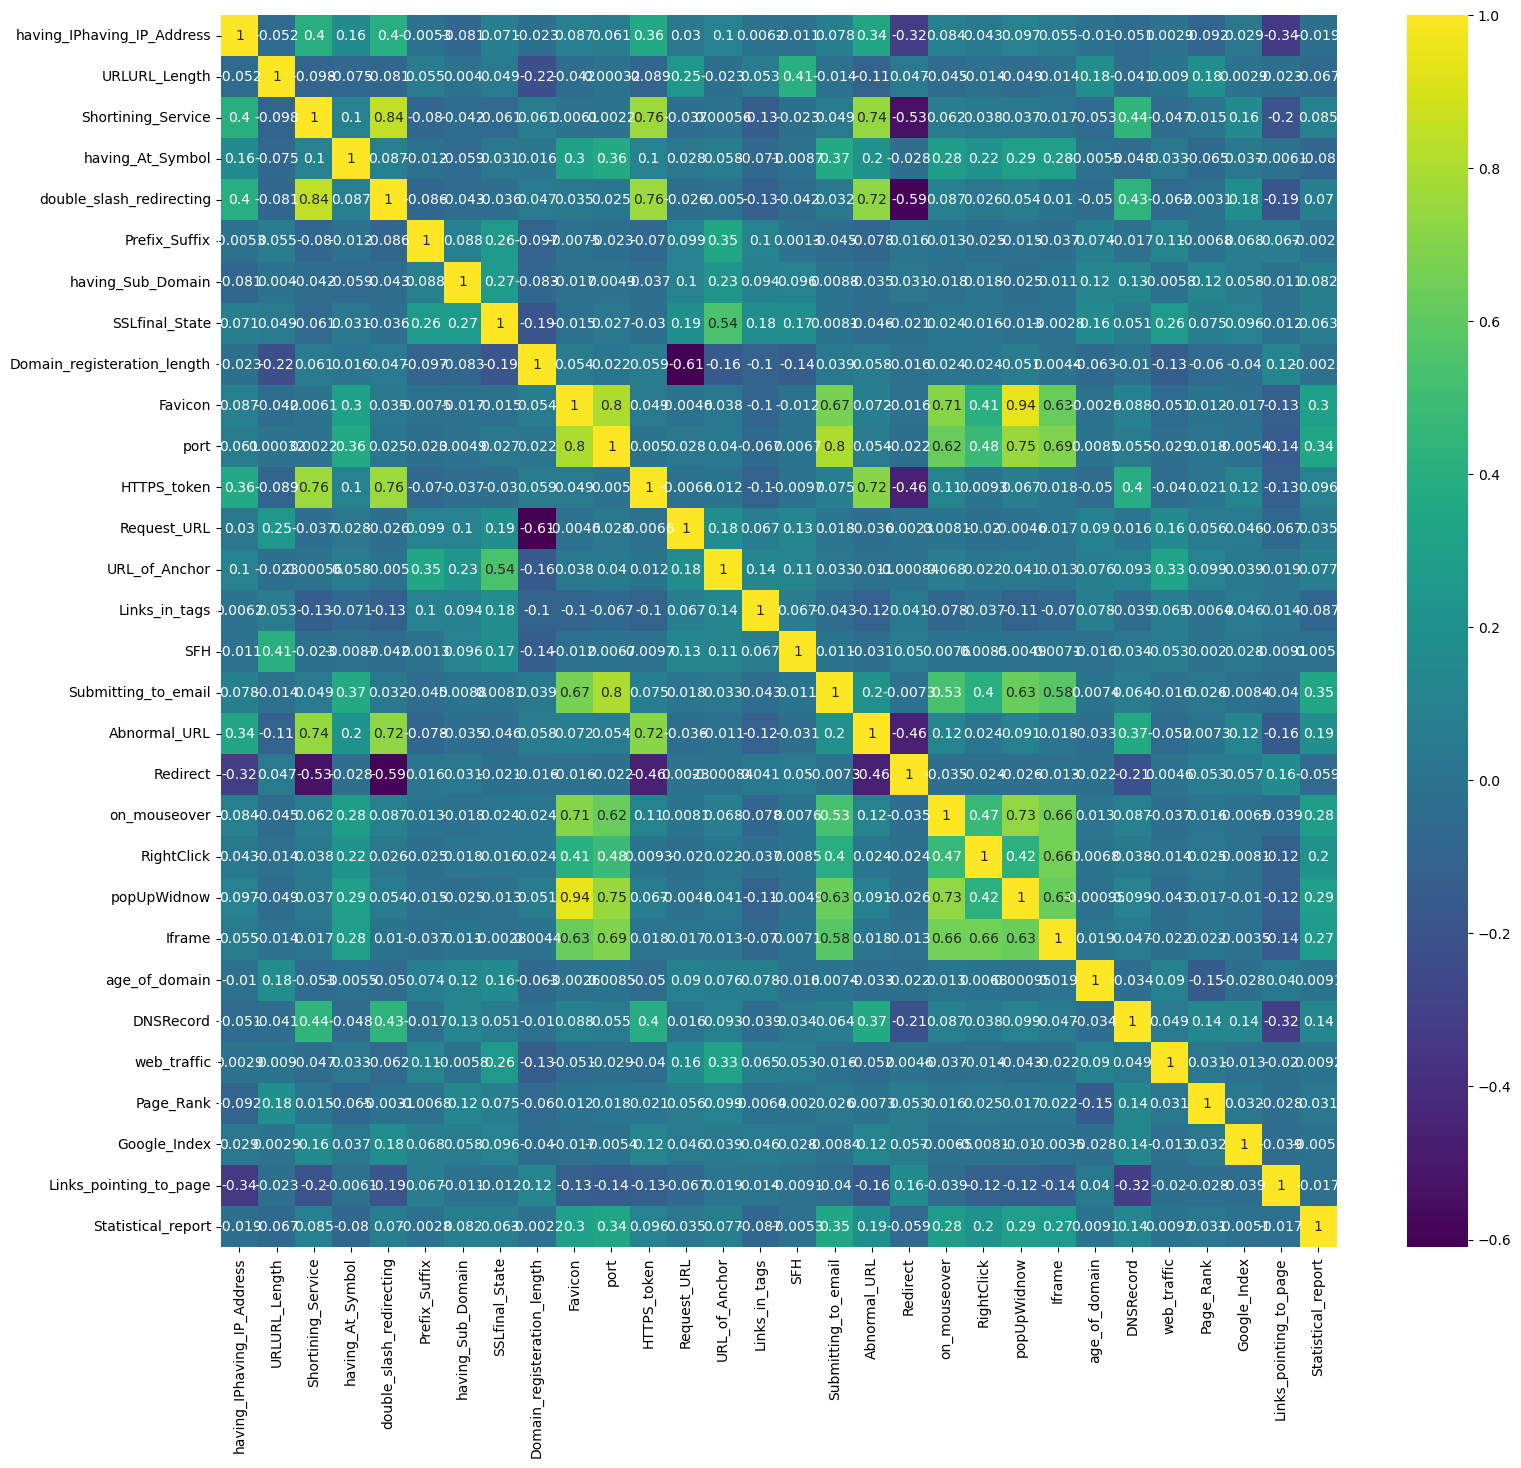

In [31]:
plt.figure(figsize=(18,16))
sns.heatmap(dfcorr,annot=True,cmap="viridis")

In [33]:
cols = df_features.columns
new_cols_after_corr = list(cols)

for i in range(dfcorr.shape[0]):
    if ((abs(dfcorr.iloc[i,i+1:])>0.5).sum()>0.1):
        new_cols_after_corr.remove(cols[i])

print(len(new_cols_after_corr))
print(new_cols_after_corr[:30])

19
['having_IPhaving_IP_Address', 'URLURL_Length', 'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Abnormal_URL', 'Redirect', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


In [34]:
df_features_after_corr=df_features[new_cols_after_corr]
df_features_after_corr.head()

,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Abnormal_URL,Redirect,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,-1,-1,1,-1,1,-1,-1,0,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,-1,0,1,0,-1,-1,1,0,1,-1,-1,0,-1,1,1,1
2,1,0,1,-1,-1,1,0,-1,-1,-1,0,1,1,-1,1,-1,1,0,-1
3,1,0,1,-1,-1,-1,0,0,-1,1,0,1,-1,-1,1,-1,1,-1,1
4,1,0,1,-1,1,1,0,0,-1,1,0,1,-1,-1,0,-1,1,1,1


<Axes: >

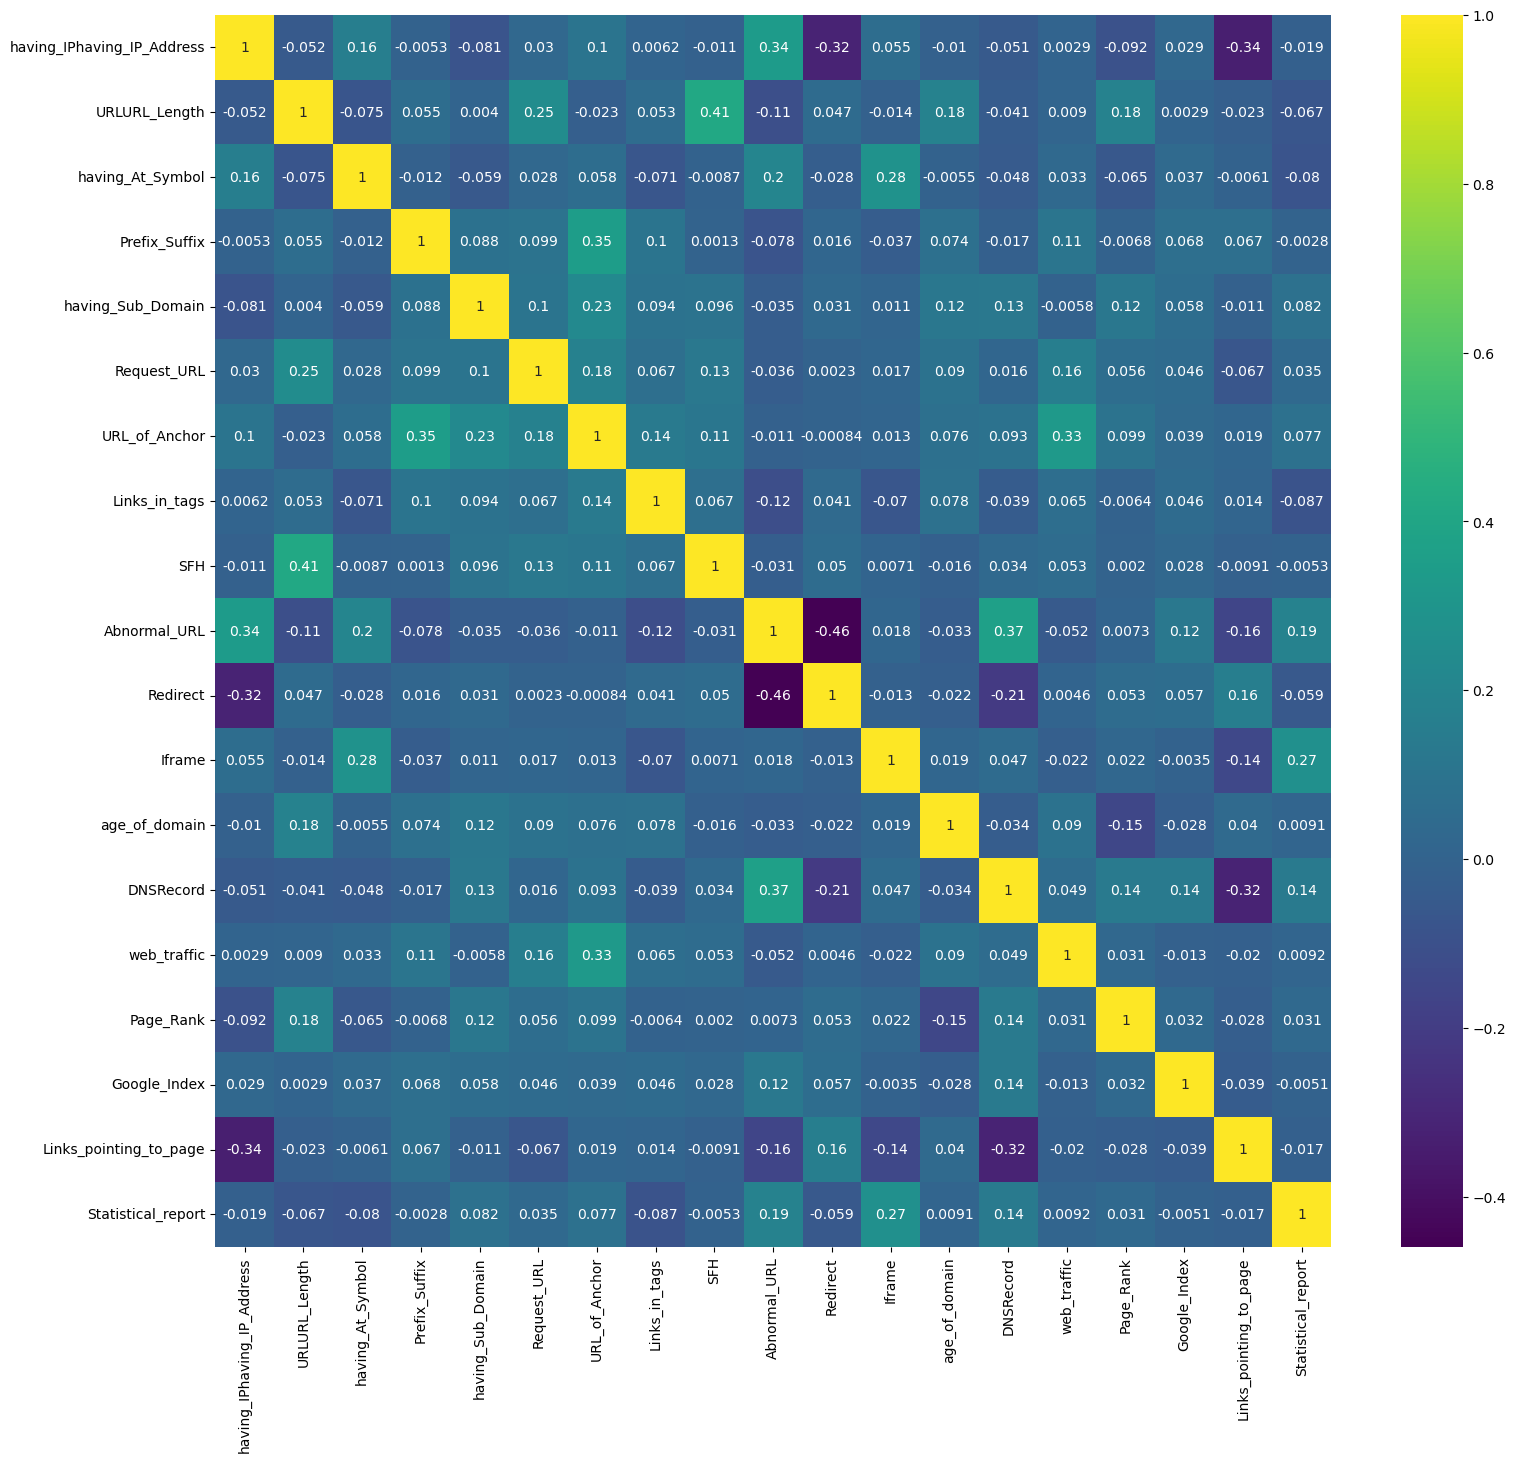

In [35]:
dfcorr2=df_features_after_corr.corr()
dfcorr2.head()
plt.figure(figsize=(18,16))
sns.heatmap(dfcorr2,annot=True,cmap="viridis")

## Classification model

In [37]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [38]:
df['Result'].unique()

array([-1,  1], dtype=int64)

In [39]:
X = df_features_after_corr.values
y = df['Result']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [41]:
lreg = LogisticRegression(random_state=0, solver="liblinear")
lreg.fit(X_train, y_train)
yhat_test = lreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, yhat_test)
print("Logistic regression - Accuracy score: ", accuracy)

Logistic regression - Accuracy score:  0.8798842257597684


[[1059  190]
 [ 142 1373]]


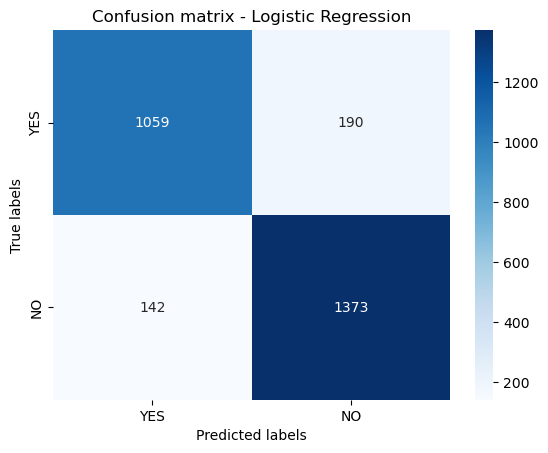

In [42]:
cm = metrics.confusion_matrix(y_test, yhat_test)
print(cm)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="g", ax=ax, cmap="Blues");
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels");
ax.set_title("Confusion matrix - Logistic Regression");
ax.xaxis.set_ticklabels(['YES', 'NO']); ax.yaxis.set_ticklabels(['YES', 'NO']);

In [43]:
y_pred_proba = lreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = sklearn.metrics.auc(fpr, tpr)

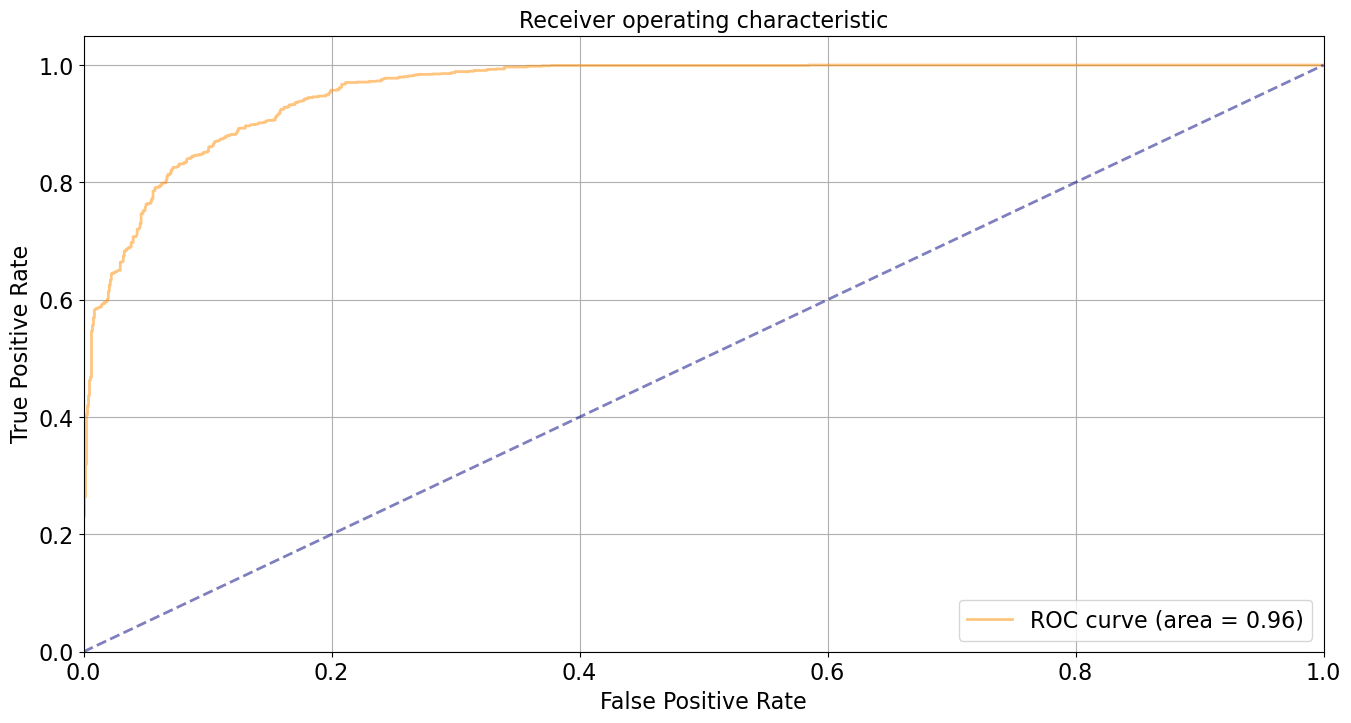

In [44]:
plt.figure(figsize=(16, 8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=16)
plt.legend(loc="lower right", fontsize=16)

plt.show()

## K-Fold cross validation

In [45]:
from sklearn.model_selection import KFold, cross_val_score

In [46]:
# Define the classifier - replace with your chosen classifier if different
classifier = DecisionTreeClassifier()

# Define KFold cross validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed

# Perform K-Fold CV and calculate accuracy
accuracies = cross_val_score(classifier, X, y, scoring='accuracy', cv=kfold)

# Print the accuracies for each fold
print("Accuracies for each fold:")
print(accuracies)

# Print the average accuracy
average_accuracy = np.mean(accuracies)
print(f"Average accuracy: {average_accuracy}")

Accuracies for each fold:
[0.93396653 0.94527363 0.93034826 0.94482135 0.93532338]
Average accuracy: 0.937946630483944
